In [60]:
%load_ext autoreload
%autoreload 2

import os 
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

ROOT_PATH = os.path.dirname(os.getcwd())
sys.path.append(ROOT_PATH)

from src_.evals.run_model import run_model, build_model, load_saved_model
from src_.config import Config
from src_.utils.general import multi_target_train_test_split, sample_arrays
from src_.evals.data_processing import get_and_process_data
from src_.evals.stability_score import plot_stability_score_correlation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Clip to dynamic ranges

In [58]:
DATA_PATH = os.path.join(ROOT_PATH, "data/210728_scrambles_for_unstructure_model.csv")
DATA2_PATH = os.path.join(ROOT_PATH, "data/210728_dmsv2_alldata.csv")

### Plot 2D distributions

Unclipped

In [59]:
X, kT, kC = get_and_process_data(DATA_PATH)
X_folded, kT_folded, kC_folded = get_and_process_data(DATA2_PATH)

X_sampled, kT_sampled, kC_sampled = sample_arrays([X, kT, kC], 1000)
X_folded_sampled, kT_folded_sampled, kC_folded_sampled = sample_arrays([X_folded, kT_folded, kC_folded], 1000)

In [61]:
annots_r2 = [np.round(pearsonr(kT, kC)[0], 2), np.round(pearsonr(kT_folded, kC_folded)[0], 2)]

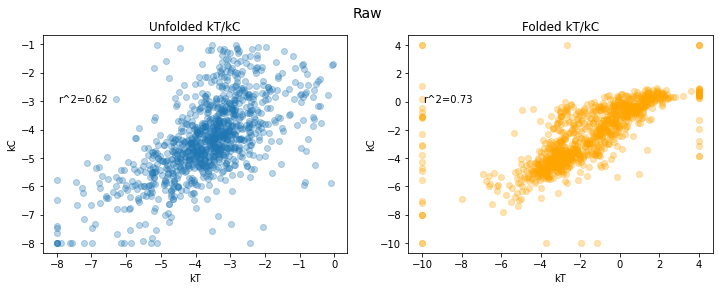

In [62]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(kT_sampled, kC_sampled, alpha=0.3)
ax.set_xlabel("kT")
ax.set_ylabel("kC")
ax.set_title("Unfolded kT/kC")
ax.annotate(f"r^2={annots_r2[0]}", xy=(15, 150), xycoords="axes points")

ax = fig.add_subplot(1, 2, 2)
ax.scatter(kT_folded_sampled, kC_folded_sampled, alpha=0.3, c= "orange")
ax.set_xlabel("kT")
ax.set_ylabel("kC")
ax.set_title("Folded kT/kC")
ax.annotate(f"r^2={annots_r2[1]}", xy=(15, 150), xycoords="axes points")


plt.suptitle("Raw", fontsize=14)
plt.show()

Clipped or removed

In [ ]:
X, kT, kC = get_and_process_data(DATA_PATH, fit_to_range="clip")
X_folded, kT_folded, kC_folded = get_and_process_data(DATA2_PATH, fit_to_range="clip")


In [69]:
X_sampled, kT_sampled, kC_sampled = sample_arrays([X, kT, kC], 1000)
X_folded_sampled, kT_folded_sampled, kC_folded_sampled = sample_arrays([X_folded, kT_folded, kC_folded], 1000)

In [70]:
annots_r2 = [np.round(pearsonr(kT, kC)[0], 2), np.round(pearsonr(kT_folded, kC_folded)[0], 2)]

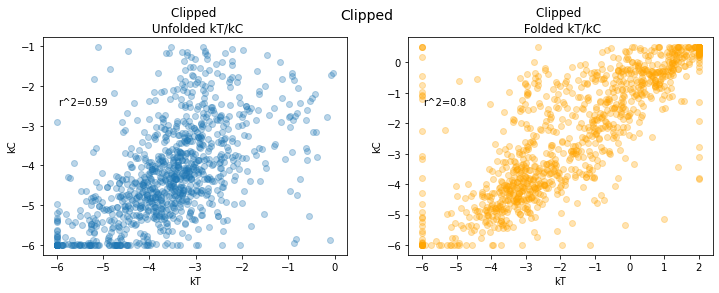

In [71]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(kT_sampled, kC_sampled, alpha=0.3)
ax.set_xlabel("kT")
ax.set_ylabel("kC")
ax.set_title("Clipped \n Unfolded kT/kC")
ax.annotate(f"r^2={annots_r2[0]}", xy=(15, 150), xycoords="axes points")

ax = fig.add_subplot(1, 2, 2)
ax.scatter(kT_folded_sampled, kC_folded_sampled, alpha=0.3, c= "orange")
ax.set_xlabel("kT")
ax.set_ylabel("kC")
ax.set_title("Clipped \n Folded kT/kC")
ax.annotate(f"r^2={annots_r2[1]}", xy=(15, 150), xycoords="axes points")


plt.suptitle("Clipped", fontsize=14)
plt.show()